# **Kaggle HW5: Benedict Wong**

### **Code**

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load data
df_train = pd.read_csv('edx_train.csv')
df_test = pd.read_csv('edx_test.csv')
df_train

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts
0,HarvardX/CS50x/2012,MHxPC130545492,1,1,1,1,United States,Master's,1984.0,m,3/10/13,7/29/13,1161.0,50.0,NaN,12.0,0
1,HarvardX/ER22x/2013_Spring,MHxPC130536944,1,1,1,1,United Kingdom,Master's,1985.0,f,3/13/13,8/1/13,1360.0,10.0,NaN,29.0,0
2,HarvardX/CS50x/2012,MHxPC130442298,1,1,1,1,India,NaN,NaN,NaN,8/2/12,7/25/13,77.0,18.0,NaN,7.0,0
3,HarvardX/ER22x/2013_Spring,MHxPC130273564,1,1,1,1,United Kingdom,Bachelor's,1982.0,m,1/23/13,8/13/13,1425.0,29.0,NaN,34.0,0
4,HarvardX/CS50x/2012,MHxPC130247761,1,1,0,0,United States,Secondary,1989.0,m,3/5/13,3/5/13,6.0,1.0,NaN,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,HarvardX/CS50x/2012,MHxPC130189983,1,0,0,0,Unknown/Other,Bachelor's,1992.0,m,11/10/12,NaN,NaN,NaN,NaN,NaN,0
8754,HarvardX/PH207x/2012_Fall,MHxPC130328528,1,1,1,1,India,Master's,1972.0,f,10/1/12,1/16/13,1962.0,16.0,112.0,13.0,0
8755,HarvardX/CS50x/2012,MHxPC130195968,1,0,0,0,Unknown/Other,Doctorate,1973.0,m,9/21/12,NaN,NaN,NaN,NaN,NaN,0
8756,HarvardX/ER22x/2013_Spring,MHxPC130233019,1,1,1,1,United States,Master's,1981.0,m,6/18/13,8/19/13,1110.0,23.0,NaN,32.0,2


In [2]:
df_test

,course_id,userid_DI,registered,viewed,explored,final_cc_cname_DI,LoE_DI,YoB,gender,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts
0,HarvardX/CS50x/2012,MHxPC130476531,1,1,1,United Kingdom,Secondary,1971.0,m,10/30/12,6/27/13,132.0,34.0,NaN,12.0,0
1,HarvardX/CB22x/2013_Spring,MHxPC130559898,1,0,0,Other South Asia,Bachelor's,1984.0,m,2/6/13,11/17/13,NaN,NaN,NaN,NaN,0
2,HarvardX/PH207x/2012_Fall,MHxPC130552712,1,1,1,Egypt,Bachelor's,1985.0,f,10/20/12,1/18/13,2650.0,32.0,96.0,15.0,0
3,HarvardX/PH278x/2013_Spring,MHxPC130394971,1,1,1,Nigeria,Secondary,1988.0,m,12/27/12,8/22/13,999.0,17.0,13.0,8.0,0
4,HarvardX/ER22x/2013_Spring,MHxPC130191077,1,1,1,Other Middle East/Central Asia,NaN,NaN,NaN,5/31/13,9/7/13,2130.0,24.0,NaN,29.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,HarvardX/CS50x/2012,MHxPC130421523,1,0,0,Unknown/Other,Bachelor's,1983.0,m,9/14/12,NaN,NaN,NaN,NaN,NaN,0
2916,HarvardX/CS50x/2012,MHxPC130116114,1,1,1,Other South America,Secondary,1987.0,m,7/17/13,7/23/13,177.0,7.0,NaN,12.0,0
2917,HarvardX/PH207x/2012_Fall,MHxPC130239033,1,1,0,Egypt,NaN,1992.0,f,10/7/12,4/29/13,1198.0,9.0,397.0,3.0,0
2918,HarvardX/ER22x/2013_Spring,MHxPC130445460,1,1,0,Other Africa,Bachelor's,1991.0,m,7/29/13,7/29/13,190.0,1.0,NaN,4.0,0


In [11]:
# Drop the user ID and change to date format
df = df_train.copy()
df.drop(columns=['userid_DI'], inplace=True)
df['start_time_DI'] = pd.to_datetime(df['start_time_DI'], format='%m/%d/%y', errors='coerce')
df['last_event_DI'] = pd.to_datetime(df['last_event_DI'], format='%m/%d/%y', errors='coerce')

# Create the duration feature
df['duration_days'] = (df['last_event_DI'] - df['start_time_DI']).dt.days
df['duration_days'] = df['duration_days'].fillna(0)
df.drop(columns=['start_time_DI', 'last_event_DI'], inplace=True)

# Categorize numeric columns
numeric_cols = ['YoB', 'nevents', 'ndays_act', 'nchapters', 'nforum_posts', 'nplay_video']
df[numeric_cols] = df[numeric_cols].fillna(-1)

# Categorize categorical columns
categorical_cols = ['course_id', 'final_cc_cname_DI', 'LoE_DI', 'gender']
df = pd.get_dummies(df, columns=categorical_cols, dummy_na=True)

# Identify X and Y dataframes
X = df.drop(columns=['certified'])
y = df['certified']

df

,registered,viewed,explored,certified,YoB,nevents,ndays_act,nplay_video,nchapters,nforum_posts,...,final_cc_cname_DI_nan,LoE_DI_Bachelor's,LoE_DI_Doctorate,LoE_DI_Less than Secondary,LoE_DI_Master's,LoE_DI_Secondary,LoE_DI_nan,gender_f,gender_m,gender_nan
0,1,1,1,1,1984.0,1161.0,50.0,-1.0,12.0,0,...,False,False,False,False,True,False,False,False,True,False
1,1,1,1,1,1985.0,1360.0,10.0,-1.0,29.0,0,...,False,False,False,False,True,False,False,True,False,False
2,1,1,1,1,-1.0,77.0,18.0,-1.0,7.0,0,...,False,False,False,False,False,False,True,False,False,True
3,1,1,1,1,1982.0,1425.0,29.0,-1.0,34.0,0,...,False,True,False,False,False,False,False,False,True,False
4,1,1,0,0,1989.0,6.0,1.0,-1.0,1.0,0,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,1,0,0,0,1992.0,-1.0,-1.0,-1.0,-1.0,0,...,False,True,False,False,False,False,False,False,True,False
8754,1,1,1,1,1972.0,1962.0,16.0,112.0,13.0,0,...,False,False,False,False,True,False,False,True,False,False
8755,1,0,0,0,1973.0,-1.0,-1.0,-1.0,-1.0,0,...,False,False,True,False,False,False,False,False,True,False
8756,1,1,1,1,1981.0,1110.0,23.0,-1.0,32.0,2,...,False,False,False,False,True,False,False,False,True,False


In [14]:
# Save userid_DI for final submission
user_ids = df_test['userid_DI']

# Convert dates
df_test['start_time_DI'] = pd.to_datetime(df_test['start_time_DI'], format='%m/%d/%y', errors='coerce')
df_test['last_event_DI'] = pd.to_datetime(df_test['last_event_DI'], format='%m/%d/%y', errors='coerce')

# Compute duration
df_test['duration_days'] = (df_test['last_event_DI'] - df_test['start_time_DI']).dt.days
df_test['duration_days'] = df_test['duration_days'].fillna(0)

# Drop original date columns
df_test.drop(columns=['start_time_DI', 'last_event_DI'], inplace=True)

# Fill missing numeric values
numeric_cols = ['YoB', 'nevents', 'ndays_act', 'nchapters', 'nforum_posts', 'nplay_video']
df_test[numeric_cols] = df_test[numeric_cols].fillna(-1)

# One-hot encode same categorical columns
categorical_cols = ['course_id', 'final_cc_cname_DI', 'LoE_DI', 'gender']
df_test = pd.get_dummies(df_test, columns=categorical_cols, dummy_na=True)

# Drop user_DI from features (keep for submission)
X_test = df_test.drop(columns=['userid_DI'])


In [15]:
# Ensure test set has same columns as train set
X_test = X_test.reindex(columns=X.columns, fill_value=0)

In [20]:
# Properly scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into validation and train sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train

,registered,viewed,explored,YoB,nevents,ndays_act,nplay_video,nchapters,nforum_posts,duration_days,...,final_cc_cname_DI_nan,LoE_DI_Bachelor's,LoE_DI_Doctorate,LoE_DI_Less than Secondary,LoE_DI_Master's,LoE_DI_Secondary,LoE_DI_nan,gender_f,gender_m,gender_nan
8413,1,1,0,-1.0,4.0,1.0,-1.0,1.0,0,1.0,...,False,False,False,False,True,False,False,False,False,True
5049,1,1,0,1985.0,33.0,3.0,-1.0,1.0,0,2.0,...,False,True,False,False,False,False,False,False,True,False
7402,1,1,1,-1.0,3978.0,110.0,-1.0,26.0,0,209.0,...,False,False,False,False,False,False,True,False,False,True
1535,1,0,0,1979.0,3.0,1.0,-1.0,-1.0,0,0.0,...,False,False,False,False,True,False,False,False,True,False
5518,1,0,0,1983.0,-1.0,-1.0,-1.0,-1.0,0,0.0,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,1,1,1943.0,1519.0,32.0,-1.0,31.0,0,226.0,...,False,False,False,False,True,False,False,False,True,False
5191,1,1,0,1984.0,747.0,32.0,-1.0,12.0,1,191.0,...,False,False,False,False,True,False,False,False,True,False
5390,1,1,1,1981.0,1338.0,8.0,-1.0,34.0,0,51.0,...,False,False,False,False,True,False,False,False,True,False
860,1,1,1,1982.0,2156.0,29.0,230.0,13.0,0,96.0,...,False,False,False,False,True,False,False,True,False,False


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression with 2 C values
lr1 = LogisticRegression(C=1.0, max_iter=5000)
lr2 = LogisticRegression(C=0.1, max_iter=5000)

# Train the Logsitic Regression models
lr1.fit(X_train, y_train)
lr2.fit(X_train, y_train)

# Random Forest with 2 sets of hyperparameters
rf1 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf2 = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)

# Train the Random Forest models
rf1.fit(X_train, y_train)
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

LogReg (C=1.0) Accuracy: 0.9561


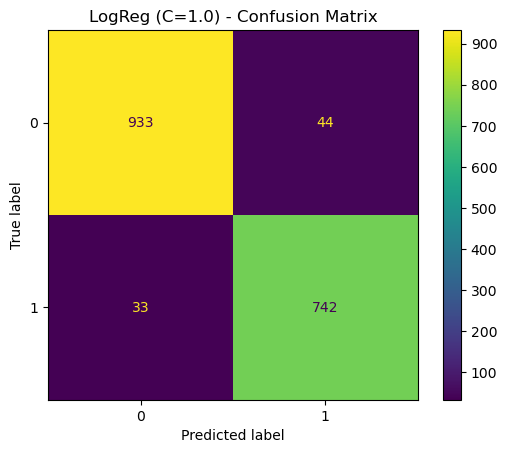

LogReg (C=0.1) Accuracy: 0.9521


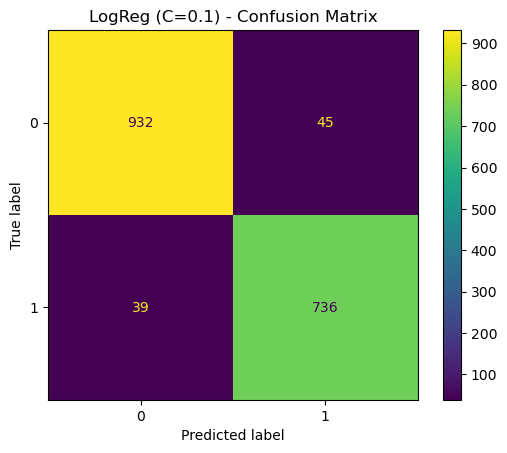

RandomForest (100/10) Accuracy: 0.9709


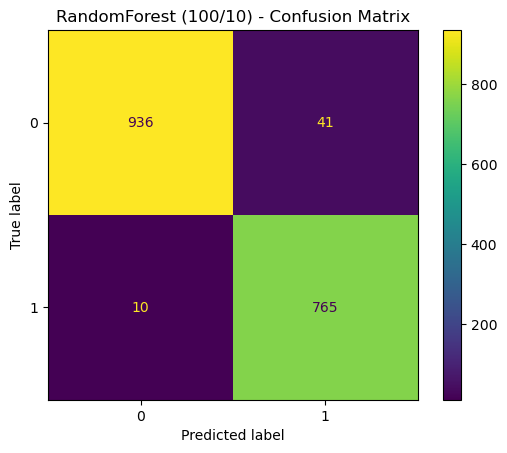

RandomForest (200/20) Accuracy: 0.9726


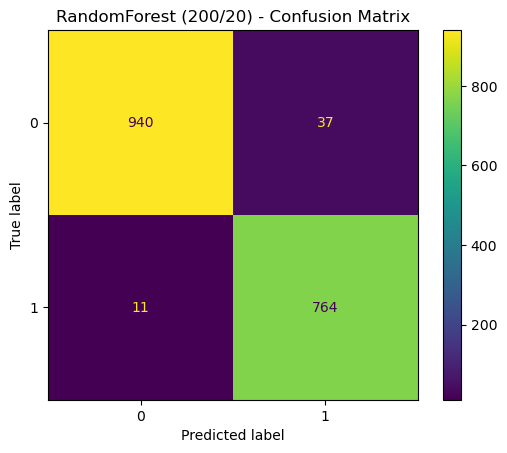

In [32]:
# Name the models
models = {
    "LogReg (C=1.0)": lr1,
    "LogReg (C=0.1)": lr2,
    "RandomForest (100/10)": rf1,
    "RandomForest (200/20)": rf2
}

# Extract the accuracy and draw the confusion matrix
for name, model in models.items():
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


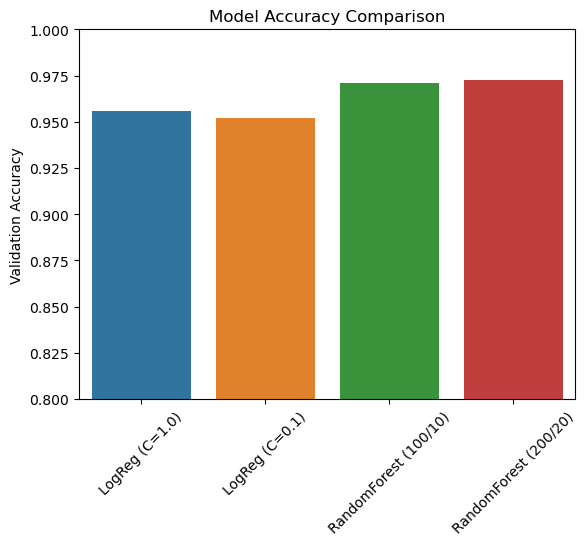

In [33]:
# Extract the accuracies into a bar plot for evaluation
accuracies = {name: accuracy_score(y_val, model.predict(X_val)) for name, model in models.items()}
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.ylabel("Validation Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.show()


In [27]:
# Realign and write into csv
X_test_aligned = X_test.reindex(columns=X.columns, fill_value=0)
y_test_pred = rf2.predict(X_test_aligned)
submission = pd.DataFrame({
    'userid_DI': user_ids,
    'certified': y_test_pred
})

submission.to_csv('submission.csv', index=False)

### **Training the Models**

I trained two types of classification models: logistic regression and random forest. For each model, I tested two different hyperparameter settings. In the logistic regression, the hyperparamters changed were regularization strength (C=1.0 and C=0.1) and increased the number of iterations to help the model converge. For random forests, I varied the number of trees (n_estimators=100 and 200) and the maximum tree depth (max_depth=10 and 20). The random forest with 200 trees and a depth of 20 performed the best, achieving a validation accuracy of 97.26%. From the confusion matrices,  this model had a good balance of precision and recall, with very few false predictions. The accuracy comparison chart confirmed that this model consistently outperformed the others, and in fact the random forest is a better model in general for this data set.

### **Feature Selection**

I used a mix of numerical, categorical, binary, and date-based features from the dataset, in essence I used most of it. Numerical features like nevents, ndays_act, nchapters, and nplay_video captured student engagement, while categorical features such as course_id, final_cc_cname_DI, LoE_DI, and gender were one-hot encoded. If the data was not easily one-hot encoded or pure numerical, I feature engineered, for example I also created a new feature, duration_days, by calculating the time difference between a student’s registration and their last interaction. Missing numerical values were filled with -1 to keep the data consistent. Based on the random forest model’s performance, features had a non-linear relationship though linearity was present to a certain extent.

### **Ethical Implications**

Using this model to tailor course content for profit raises important ethical concerns. If the company prioritizes students from certain countries, genders, or educational backgrounds because they are more likely to complete the course and pay for certificates, it could reinforce existing inequalities. Students from underrepresented or disadvantaged groups might receive less support or be excluded from targeted improvements, widening the education gap. The model may also reflect biases in the training data, for example, if students from certain regions had less access to stable internet or time to participate. Instead of using the model solely for profit, it would be more ethical to use it to identify students who may need extra support, so that resources can be used to help more people succeed equally.